In [1]:
import numpy as np
import magic
import anndata as ad
import numpy as np
import scprep
from magic import MAGIC
import scipy
from tools import *

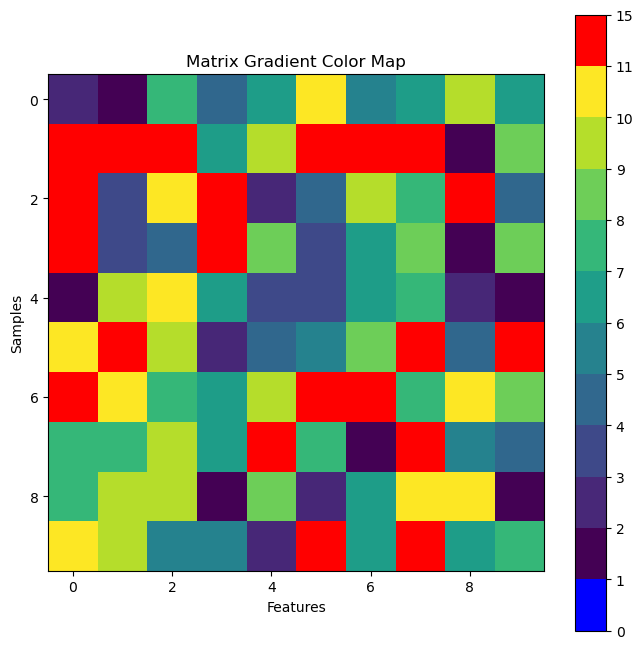

In [2]:
matrix = np.random.randint(1, 15, (10, 10))
plot_gradient_matrix(matrix)

In [21]:
X=read_mat('original')

In [8]:
X=read_mat('cp10k')

In [11]:
X=read_mat('logcp10k')

In [6]:
X=read_mat('sqrtcp10k')

In [24]:
X=np.loadtxt('./inDrop1_HEG.txt')

In [23]:
y=X.flatten()
len(y[y!=0])/len(y)

0.09920217430964016

In [25]:
X=np.array(X,dtype=int)
X,X.shape

(array([[ 1,  2, 54, ...,  3,  3,  8],
        [ 0,  1, 37, ...,  2, 10, 31],
        [ 0,  0, 18, ...,  0,  4,  9],
        ...,
        [ 0,  2,  4, ...,  0,  0,  0],
        [ 1,  2,  0, ...,  0,  0,  0],
        [ 0,  0,  3, ...,  1,  0,  1]]),
 (1937, 765))

In [27]:
X=X[:6]
X

array([[ 1,  2, 54, ...,  3,  3,  8],
       [ 0,  1, 37, ...,  2, 10, 31],
       [ 0,  0, 18, ...,  0,  4,  9],
       [ 0,  0, 42, ...,  4,  5, 19],
       [ 0,  0, 47, ...,  5,  8, 15],
       [ 0,  0,  3, ...,  2,  6, 16]])

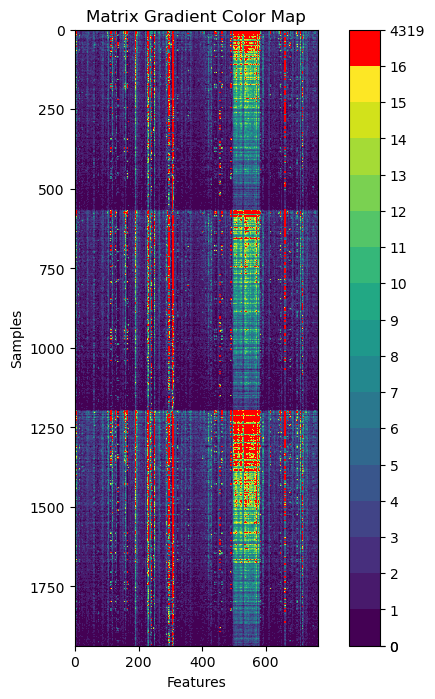

In [5]:
plot_gradient_matrix(X,0,15)

In [7]:
def pca_svd(matrix, n_components):
    """
    使用SVD实现PCA降维。

    参数：
    matrix (numpy.ndarray): 需要降维的输入矩阵。
    n_components (int): 目标维度数。

    返回：
    numpy.ndarray: 降维后的矩阵。
    """
    # 确保输入矩阵是numpy数组
    matrix = np.array(matrix)
    
    # 中心化数据
    matrix_mean = np.mean(matrix, axis=0)
    centered_matrix = matrix - matrix_mean
    
    # 使用SVD分解矩阵
    U, S, Vt = np.linalg.svd(centered_matrix, full_matrices=False)
    
    # 选择前n_components个奇异值和对应的向量
    U_reduced = U[:, :n_components]
    S_reduced = S[:n_components]
    Vt_reduced = Vt[:n_components, :]
    
    # 计算降维后的矩阵
    reduced_matrix = np.dot(U_reduced, np.diag(S_reduced))
    
    return reduced_matrix


In [8]:
np.pi*1**2/2**2,np.pi*4/3*1**3/2**3

(0.7853981633974483, 0.5235987755982988)

In [9]:
def manhatten(list1,list2):
    s=0
    for i in range(len(list1)):
        s+=abs(list1[i]-list2[i])
    return s
dis=np.zeros([len(X),len(X)])
for i in range(len(X)):
    if(i%100==0):
        print(i/100)
    for j in range(len(X)):
        if(i>j):
            d=manhatten(X[i],X[j])
            dis[i][j]=d
dis

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0


array([[    0.,     0.,     0., ...,     0.,     0.,     0.],
       [ 7504.,     0.,     0., ...,     0.,     0.,     0.],
       [ 5828.,  8014.,     0., ...,     0.,     0.,     0.],
       ...,
       [15223., 19117., 12851., ...,     0.,     0.,     0.],
       [15365., 19323., 12999., ...,  1076.,     0.,     0.],
       [15264., 19174., 12844., ...,   833.,  1053.,     0.]])

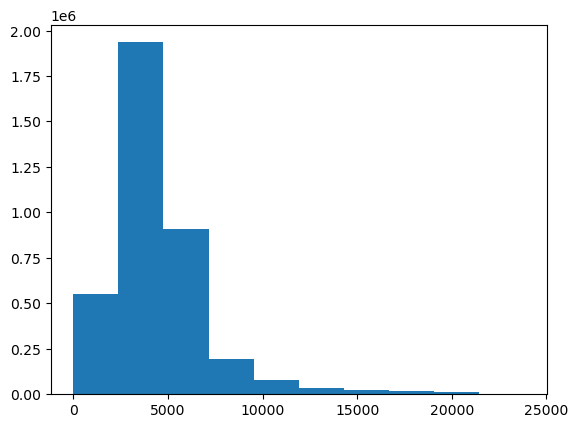

In [17]:
dis=LtoFull(dis)
plt.hist(dis.flatten())
dispp=dis

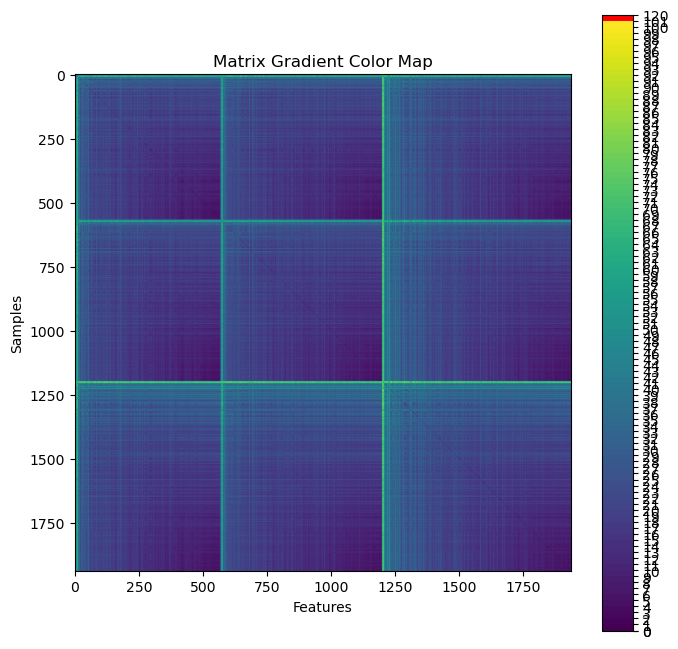

In [18]:
dis2=np.array(dis/200,dtype=int)
plot_gradient_matrix(dis2,0,100)

In [21]:
np.e**(-0.5)

0.6065306597126334

In [10]:
def get_sigma(l_dist,knn):
    dis=np.sort(l_dist)[(int(knn/2)+1)]
    return dis
def dis_to_aff(dis_m,knn=10,threshold=2,kernel_type='gaussian',kernel_width='fix',v=1):
    aff=np.zeros_like(dis_m)
    sigma=np.zeros(len(dis_m))
    for i in range(len(dis_m)):
        sigma[i]=get_sigma(dis_m[i],knn)
    if(kernel_type=='gaussian'):
        if(kernel_width=='fix'):
            for i in range(len(dis_m)):
                for j in range(len(dis_m[i])):
                    if(dis_m[i][j]>threshold*sigma[i]):
                        aff[i][j]=0
                    else:
                        aff[i][j]=np.e**(-(dis_m[i][j]**2)/sigma[i]**2/2)
        if(kernel_width=='mutual'):
            for i in range(len(dis_m)):
                for j in range(len(dis_m[i])):
                    if(dis_m[i][j]>threshold*(sigma[i]*sigma[j])**0.5):
                        aff[i][j]=0
                    else:
                        aff[i][j]=np.e**(-(dis_m[i][j]**2)/sigma[i]/sigma[j]/2)
    if(kernel_type=='t'):
        if(kernel_width=='fix'):
            for i in range(len(dis_m)):
                for j in range(len(dis_m[i])):
                    if(dis_m[i][j]>threshold*(sigma[i]*sigma[j])**0.5):
                        aff[i][j]=0
                    else:
                        aff[i][j]=(1+(dis_m[i][j]**2)/v/(sigma[i]*sigma[j]))**(-(v+1)/2)
        if(kernel_width=='mutual'):
            for i in range(len(dis_m)):
                for j in range(len(dis_m[i])):
                    if(dis_m[i][j]>threshold*(sigma[i]*sigma[j])**0.5):
                        aff[i][j]=0
                    else:
                        aff[i][j]=(1+(dis_m[i][j]**2)/v/(sigma[i]*sigma[j]))**(-(v+1)/2)  
    if(kernel_type=='laplace'):
        if(kernel_width=='fix'):
            for i in range(len(dis_m)):
                for j in range(len(dis_m[i])):
                    if(dis_m[i][j]>threshold*(sigma[i])):
                        aff[i][j]=0
                    else:
                        aff[i][j]=np.e**(-(dis_m[i][j])/(sigma[i])
        if(kernel_width=='mutual'):
            for i in range(len(dis_m)):
                for j in range(len(dis_m[i])):
                    if(dis_m[i][j]>threshold*(sigma[i]*sigma[j])**0.5):
                        aff[i][j]=0
                    else:
                        aff[i][j]=np.e**(-(dis_m[i][j])/(sigma[i]*sigma[j])**0.5)
    return aff
def aff_to_prob(l,t=1):
    prob=cp(l,1)
    p=np.linalg.matrix_power(prob,t)
    return p
aff_gaussian1=dis_to_aff(dispp,threshold=1.5)
aff_gaussian2=dis_to_aff(dispp,threshold=2)
aff_gaussian3=dis_to_aff(dispp,threshold=3)
aff_gaussian4=dis_to_aff(dispp,threshold=1.5,kernel_width='mutual')
aff_gaussian5=dis_to_aff(dispp,threshold=2,kernel_width='mutual')
aff_gaussian6=dis_to_aff(dispp,threshold=3,kernel_width='mutual')
gaussian_aff=[aff_gaussian1,aff_gaussian2,aff_gaussian3,aff_gaussian4,aff_gaussian5,aff_gaussian6]
aff_t1=dis_to_aff(dispp,threshold=1.5)
aff_t2=dis_to_aff(dispp,threshold=2)
aff_t3=dis_to_aff(dispp,threshold=3)
aff_t4=dis_to_aff(dispp,threshold=1.5,kernel_width='mutual',kernel_type='t')
aff_t5=dis_to_aff(dispp,threshold=2,kernel_width='mutual',kernel_type='t')
aff_t6=dis_to_aff(dispp,threshold=3,kernel_width='mutual',kernel_type='t')
t_aff=[aff_t1,aff_t2,aff_t3,aff_t4,aff_t5,aff_t6]
gaussian_aff=np.array(gaussian_aff)
t_aff=np.array(t_aff)
aff_dic={
    'gaussian':gaussian_aff,
    't':t_aff
}
gaussian_prob=[]
t_prob=[]
for i in range(len(aff_dic['gaussian'])):
    gaussian_prob.append(aff_to_prob(aff_dic['gaussian'][i],t=3))
for i in range(len(aff_dic['t'])):
    t_prob.append(aff_to_prob(aff_dic['t'][i],t=3))
gaussian_prob=np.array(gaussian_prob)
t_prob=np.array(t_prob)
prob_dic={
    'gaussian':gaussian_prob,
    't':t_prob
}

SyntaxError: invalid syntax (543150260.py, line 47)

In [93]:
sigma=2
v=1
ddd=2*sigma
(1+(ddd**2)/v/(sigma**2))**(-(v+1)/2),np.e**(-(ddd**2)/sigma**2/2)

(0.2, 0.1353352832366127)

In [82]:
aff=dis_to_aff(dis,threshold=2,kernel_type='gaussian',kernel_width='fix')

[1, 2, 3]

In [ ]:
for i in range(len(prob_dic['gaussian'])):
    plot_gradient_matrix(prob_dic['gaussian'][i]@X,0,15,file_path='./MAGIC_denoising_graph/gaussian/'+str(i)+'.png')
    plot_gradient_matrix(prob_dic['t'][i]@X,0,15,file_path='./MAGIC_denoising_graph/t/'+str(i)+'.png')
plot_gradient_matrix(X,0,15,file_path='./MAGIC_denoising_graph/MAGIC.png')



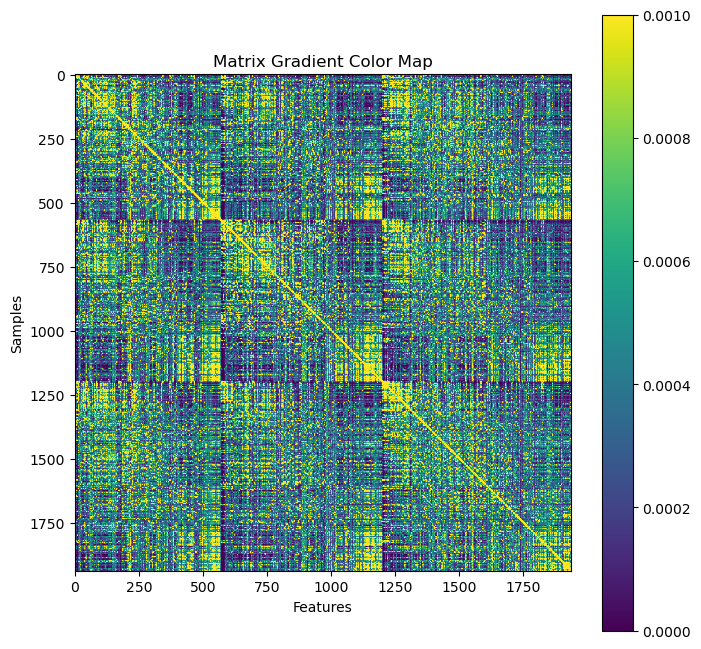

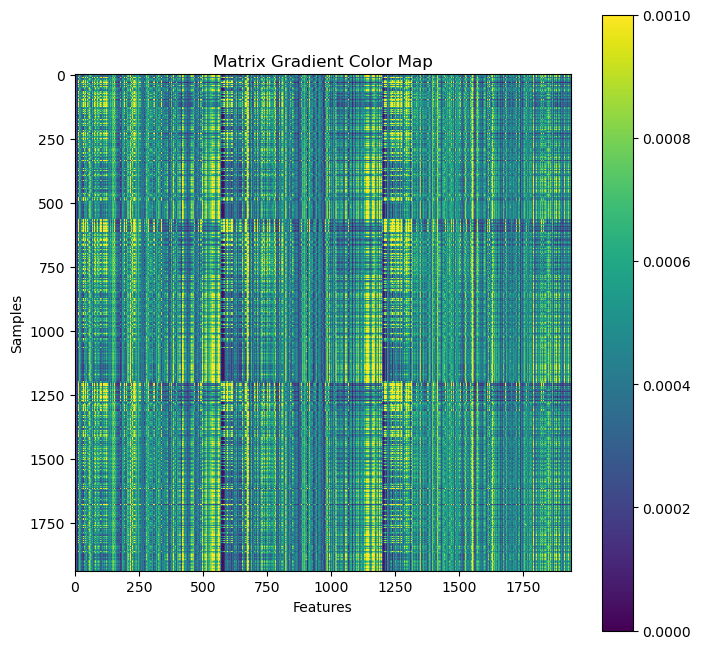

array([[8.12595773e-02, 2.76923097e-02, 4.81355505e-03, ...,
        4.97055220e-04, 2.59772096e-06, 5.98912217e-05],
       [1.83173297e-02, 5.37498852e-02, 2.55820406e-03, ...,
        5.86199881e-04, 9.58805029e-06, 1.11330107e-04],
       [1.08159713e-02, 8.69024032e-03, 1.82588804e-01, ...,
        5.88863918e-06, 4.42817483e-08, 1.83719694e-06],
       ...,
       [3.29960008e-05, 5.88300762e-05, 1.73969064e-07, ...,
        5.39425193e-03, 1.48490050e-04, 1.09613617e-03],
       [2.92856390e-07, 1.63414100e-06, 2.22171005e-09, ...,
        2.52175500e-04, 9.16087094e-03, 4.78906667e-05],
       [8.41898069e-06, 2.36595231e-05, 1.14935045e-07, ...,
        2.32115521e-03, 5.97152175e-05, 1.14227560e-02]])

In [219]:

plot_gradient_matrix(cp(d,1),0,1e-3,1)
prob=cp(d,1)
for i in range(20):
    prob@=cp(d,1)
plot_gradient_matrix(m,0,1e-3,1)
cp(d,1)

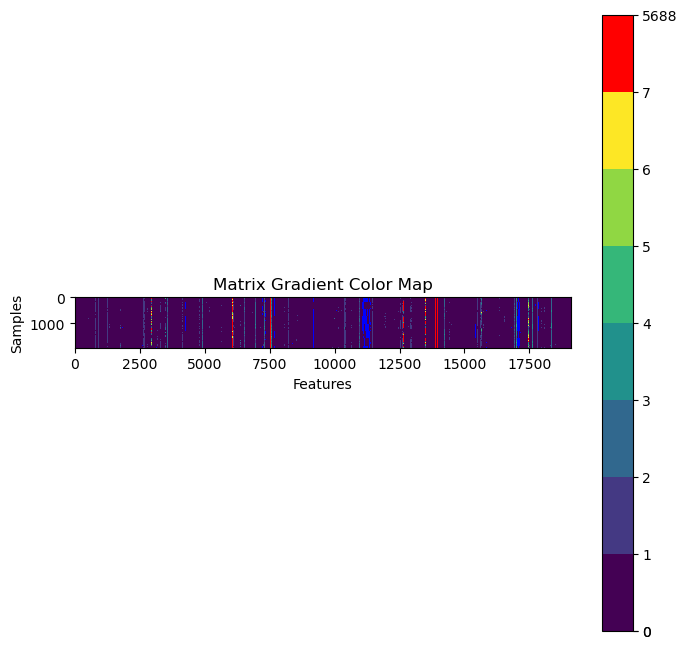

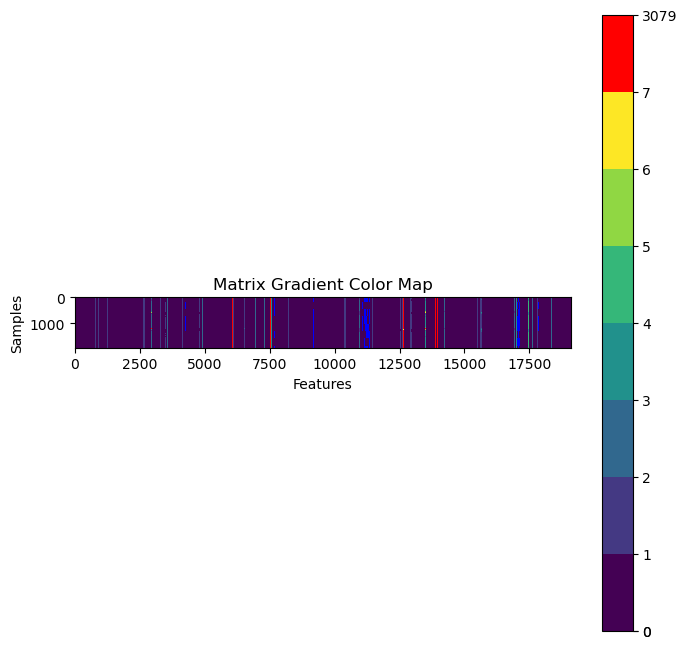

In [196]:
plot_gradient_matrix(X,0,6)
plot_gradient_matrix(prob@X,0,6)

In [84]:
norm_fn = np.sqrt
denorm_fn=np.square

In [222]:
par = {
    "input_train": "resources_test/denoising/pancreas/train.h5ad",
    "output": "output_magic.h5ad",
    "solver": "exact",
    "norm": "sqrt",
    "decay": 1,
    "t": 3,
}
X, libsize = scprep.normalize.library_size_normalize(
    X,
    rescale=1,
    return_library_size=True
)
X = scprep.utils.matrix_transform(X, norm_fn)
magic = MAGIC(
    solver=par["solver"],
    decay=par["decay"],
    t=par["t"],
    verbose=False,
)
X = magic.fit_transform(X, genes="all_genes")
X = scprep.utils.matrix_transform(X, denorm_fn)
X = scprep.utils.matrix_vector_elementwise_multiply(X, libsize, axis=0)
X

C:\Users\rossoneri\AppData\Roaming\Python\Python39\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


  Running MAGIC with `solver='exact'` on 19093-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


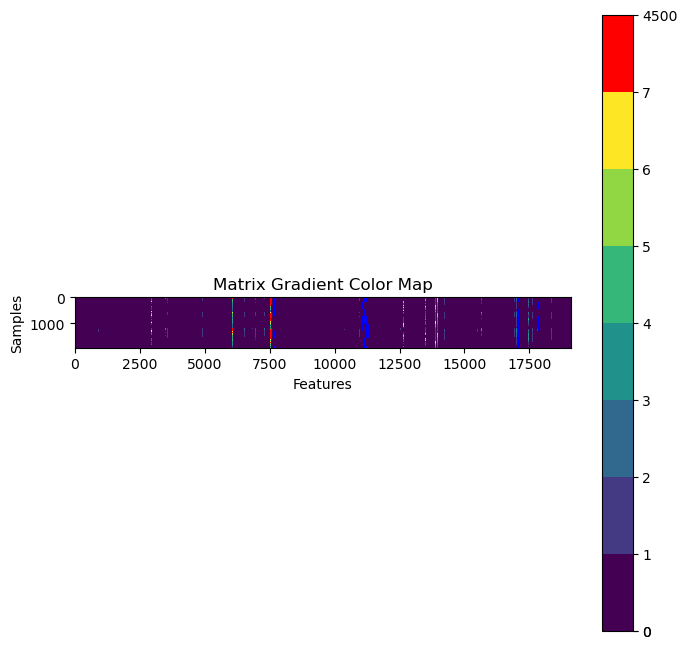

In [231]:
a=X.flatten()
for i in range(len(a)):
    if(a[i]<0):
        print('sda')
        a[i]=0
plot_gradient_matrix(X,0,6,0)

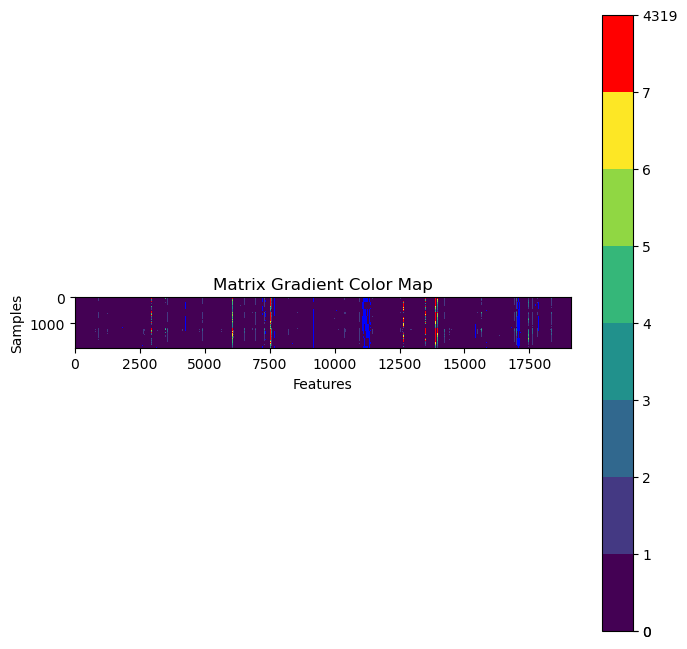

In [233]:
plot_gradient_matrix(X,0,6,0)

In [61]:
from sklearn.cluster import KMeans
K=14
kmeans = KMeans(n_clusters=K, random_state=None)  
kmeans.fit(X)  
labels = kmeans.predict(X)  
print(len(labels))
lb=[]
for i in range(len(labels)):
    lb.append(str(int(labels[i])))
lb=np.array(lb)
np.savetxt("./labelsMAGIC.txt",lb,fmt="%s")

C:\Users\rossoneri\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1937


In [13]:
plot_gradient_matrixdef gaussian_kernel(D,sig):
    S=np.zeros([len(D),len(D)])
    for i in range(len(D)):
        for j in range(len(D)):
            S[i][j]=np.e**(-(D[i,j])**2/2/sig**2)
            
    return S
